<a href="https://colab.research.google.com/github/beyzaatasever/Numerical-Solutions/blob/main/Bisection_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

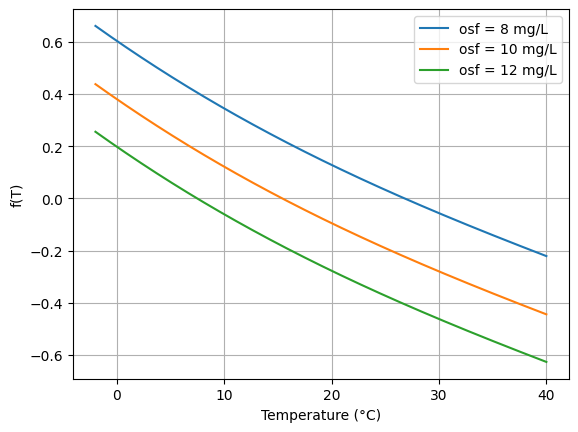

For dissolved oxygen concentration of 8 mg/L:
Temperature: 26.76 degrees Celsius
Iterations required: 9

For dissolved oxygen concentration of 10 mg/L:
Temperature: 15.35 degrees Celsius
Iterations required: 9

For dissolved oxygen concentration of 12 mg/L:
Temperature: 7.46 degrees Celsius
Iterations required: 9



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def find_temperature(osf):
    def f(T):
        return (-139.34411 + (1.575701 * 10**5)/(T + 273.15) - (6.642308 * 10**7)/(T + 273.15)**2 \
                + (1.243800 * 10**10)/(T + 273.15)**3 - (8.621949 * 10**11)/(T + 273.15)**4) - np.log(osf)

    x_l = 0
    x_u = 40

    # Initialize counter for iterations
    iterations = 0

    # Bisection loop
    while (x_u - x_l) / 2 > 0.05:
        iterations += 1
        x_r = (x_u + x_l) / 2  # Calculate new estimate

        # based on signs
        if f(x_l) * f(x_r) < 0:
            x_u = x_r
        else:
            x_l = x_r
    return (x_u + x_l) / 2, iterations

# Test cases
oxy_con = [8, 10, 12]

# Define temperature range
T = np.arange(-2, 40.01, 0.01)

# Initialize lists to store results
temperatures = []
iterations_list = []

# Iterate over each oxygen concentration
for osf in oxy_con:
    temperature, iterations = find_temperature(osf)
    temperatures.append(temperature)
    iterations_list.append(iterations)

    # Plot f(T) function
    plt.plot(T, (-139.34411 + (1.575701 * 10**5)/(T + 273.15) - (6.642308 * 10**7)/(T + 273.15)**2 \
                + (1.243800 * 10**10)/(T + 273.15)**3 - (8.621949 * 10**11)/(T + 273.15)**4) - np.log(osf), label=f"osf = {osf} mg/L")

# Show plot
plt.xlabel('Temperature (°C)')
plt.ylabel('f(T)')
plt.legend()
plt.grid(True)
plt.show()

# Output results
for osf, temperature, iterations in zip(oxy_con, temperatures, iterations_list):
    print(f"For dissolved oxygen concentration of {osf} mg/L:")
    print(f"Temperature: {temperature:.2f} degrees Celsius")
    print(f"Iterations required: {iterations}")
    print()
